In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
exams=pd.read_csv("Expanded_data_with_more_features.csv")
exams

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [3]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [4]:
exams.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
exams.fillna(0,inplace=True)

In [6]:
exams['Gender'].unique()

array(['female', 'male'], dtype=object)

In [7]:
exams.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
exams

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,0,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,0,married,sometimes,yes,0.0,0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,0,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,0,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


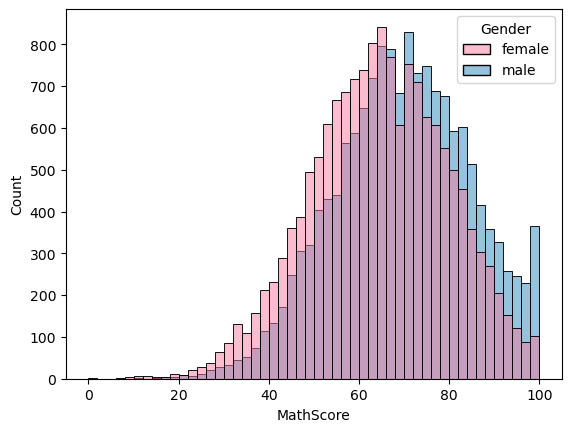

In [9]:

palette = {'female': '#F77CA0', 'male': '#2D87BB'}
sns.histplot(data=exams, x='MathScore',binwidth=2, hue='Gender',palette=palette)
plt.show()

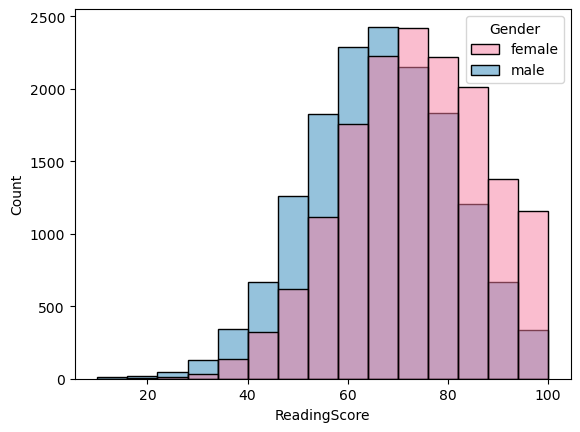

In [10]:
palette = {'female': '#F77CA0', 'male': '#2D87BB'}
sns.histplot(data=exams, x='ReadingScore',binwidth=6, hue='Gender',palette=palette)
plt.show()

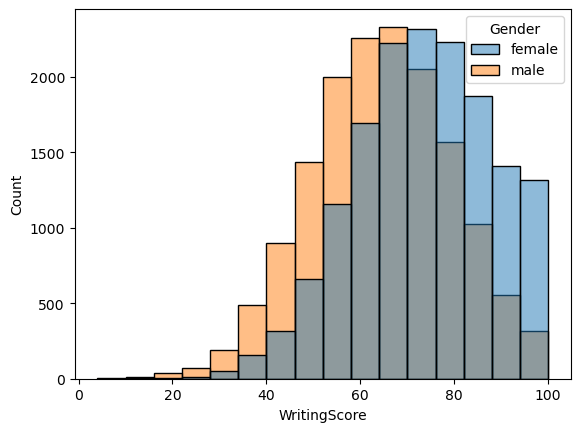

In [11]:
sns.histplot(data=exams, x='WritingScore',binwidth=6, hue='Gender')
plt.show()

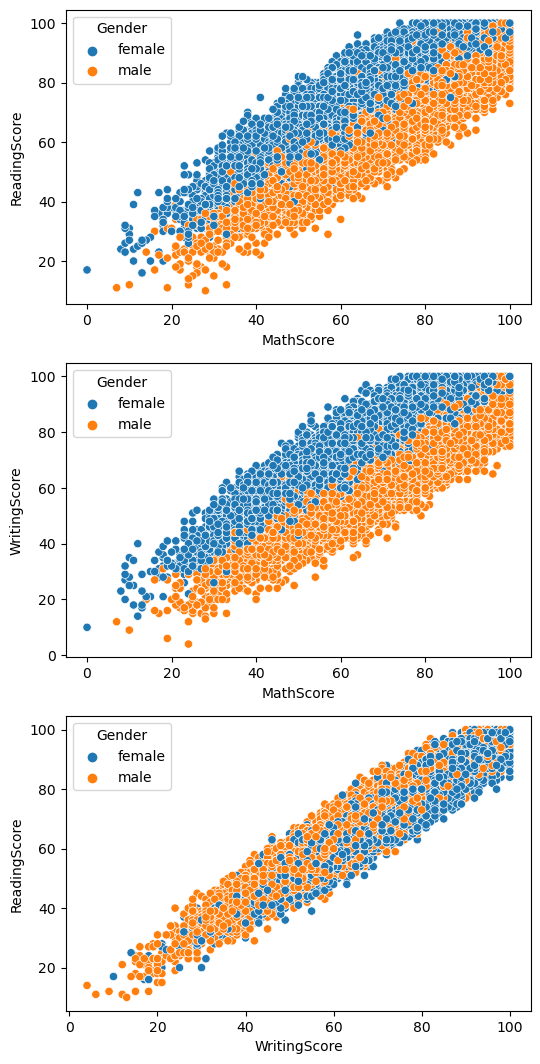

In [12]:
fig,axes = plt.subplots(3, figsize=(6,13))
sns.scatterplot(data=exams, x='MathScore', y='ReadingScore', hue='Gender',ax=axes[0])
sns.scatterplot(data=exams, x='MathScore', y='WritingScore', hue='Gender',ax=axes[1])
sns.scatterplot(data=exams, x='WritingScore', y='ReadingScore', hue='Gender',ax=axes[2])
plt.show()

In [13]:
exams_100=exams[(exams['MathScore']==100)&(exams['ReadingScore']==100)&(exams['WritingScore']==100)]

In [14]:
exams_100.Gender.value_counts()/exams_100.Gender.shape[0]

female    0.531915
male      0.468085
Name: Gender, dtype: float64

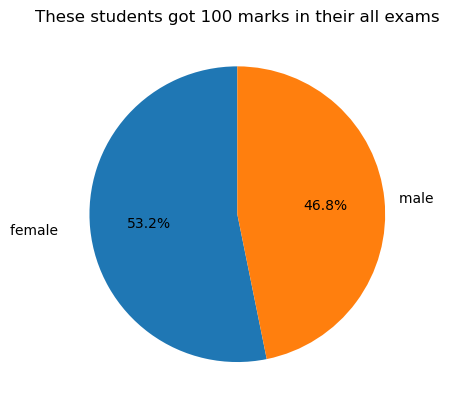

In [15]:
plt.title('These students got 100 marks in their all exams')
plt.pie(exams_100['Gender'].value_counts(),labels=['female    ','male      '],autopct='%1.1f%%',startangle=90)


plt.show()

In [16]:
exams_90=exams[(exams['MathScore']>=90)&(exams['ReadingScore']>=90)&(exams['WritingScore']>=90)]
exams_90

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
105,female,group E,bachelor's degree,standard,completed,married,regularly,yes,3.0,school_bus,< 5,98,99,100
113,female,group C,some college,standard,completed,single,regularly,yes,1.0,0,5 - 10,90,94,95
138,male,group E,associate's degree,free/reduced,completed,married,regularly,no,3.0,private,5 - 10,100,100,95
153,female,group C,bachelor's degree,standard,completed,married,sometimes,yes,0.0,school_bus,5 - 10,96,100,100
166,female,group D,some high school,standard,completed,divorced,regularly,yes,0.0,school_bus,5 - 10,99,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30436,male,group B,some college,standard,completed,divorced,sometimes,no,3.0,private,5 - 10,95,94,98
30466,female,group A,associate's degree,standard,none,married,regularly,no,2.0,private,5 - 10,94,92,92
30546,male,group C,master's degree,standard,completed,divorced,regularly,no,1.0,school_bus,5 - 10,99,100,99
30579,female,group D,associate's degree,standard,none,married,sometimes,no,3.0,0,5 - 10,95,90,98


In [17]:
exams_90.Gender.value_counts()/exams_90.Gender.shape[0]*100

female    58.62423
male      41.37577
Name: Gender, dtype: float64

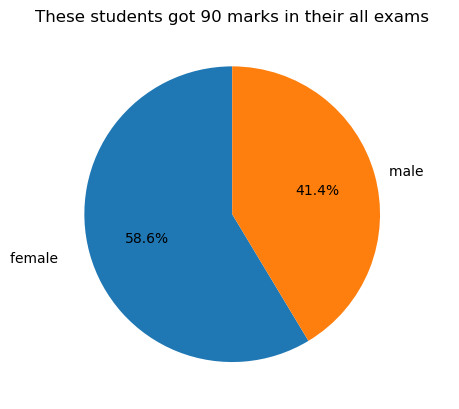

In [18]:
plt.title('These students got 90 marks in their all exams')
plt.pie(exams_90['Gender'].value_counts(),labels=['female    ','male      '],autopct='%1.1f%%',startangle=90)


plt.show()

In [54]:
exams_90=exams_90[exams_90['ParentEduc']!=0]
exams_90=exams_90[exams_90['ParentEduc']!=0]
exams_90=exams_90[exams_90['TestPrep']!=0]
exams_90=exams_90[exams_90['ParentMaritalStatus']!=0]
exams_90=exams_90[exams_90['PracticeSport']!=0]
exams_90=exams_90[exams_90['IsFirstChild']!=0]
exams_90=exams_90[exams_90['WklyStudyHours']!=0]
exams_90=exams_90[exams_90['NrSiblings']!=0]



In [55]:
exams=exams[exams['ParentEduc']!=0]
exams=exams[exams['TestPrep']!=0]
exams=exams[exams['ParentMaritalStatus']!=0]
exams=exams[exams['PracticeSport']!=0]
exams=exams[exams['IsFirstChild']!=0]
exams=exams[exams['WklyStudyHours']!=0]
exams=exams[exams['NrSiblings']!=0]



In [56]:
exams_90.ParentEduc.unique()

array(["bachelor's degree", 'some college', "associate's degree",
       'high school', 'some high school', "master's degree"], dtype=object)

In [57]:
exams_90.ParentEduc.unique()

array(["bachelor's degree", 'some college', "associate's degree",
       'high school', 'some high school', "master's degree"], dtype=object)

In [58]:

plot_1 = ((exams_90.ParentEduc.value_counts()/exams_90.ParentEduc.count())/(exams.ParentEduc.value_counts()/exams.ParentEduc.count())).sort_values(ascending = False)
plot_2 = ((exams_90.TestPrep.value_counts()/exams_90.TestPrep.count())/(exams.TestPrep.value_counts()/exams.TestPrep.count())).sort_values(ascending = False)
plot_3 = ((exams_90.ParentMaritalStatus.value_counts()/exams_90.ParentMaritalStatus.count())/(exams.ParentMaritalStatus.value_counts()/exams.ParentMaritalStatus.count())).sort_values(ascending = False)
plot_4 = ((exams_90.PracticeSport.value_counts()/exams_90.PracticeSport.count())/(exams.PracticeSport.value_counts()/exams.PracticeSport.count())).sort_values(ascending = False)
plot_5 = ((exams_90.IsFirstChild.value_counts()/exams_90.IsFirstChild.count())/(exams.IsFirstChild.value_counts()/exams.IsFirstChild.count())).sort_values(ascending = False)
plot_6 = ((exams_90.NrSiblings.value_counts()/exams_90.NrSiblings.count())/(exams.NrSiblings.value_counts()/exams.NrSiblings.count())).sort_values(ascending = False)
plot_7 = ((exams_90.WklyStudyHours.value_counts()/exams_90.WklyStudyHours.count())/(exams.WklyStudyHours.value_counts()/exams.WklyStudyHours.count())).sort_values(ascending = False)
plot_8 = ((exams_90.Gender.value_counts()/exams_90.Gender.count())/(exams.Gender.value_counts()/exams.Gender.count())).sort_values(ascending = False)

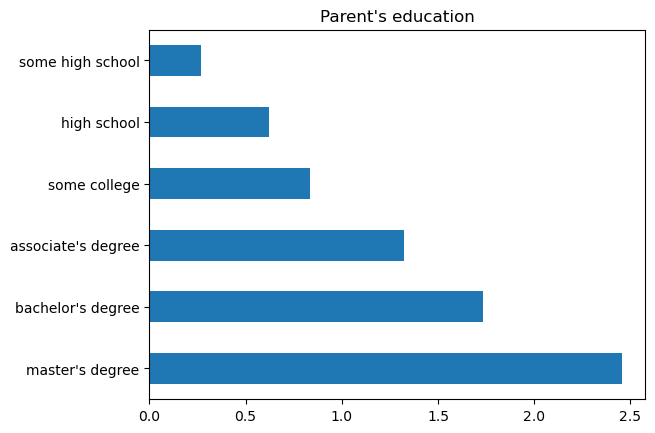

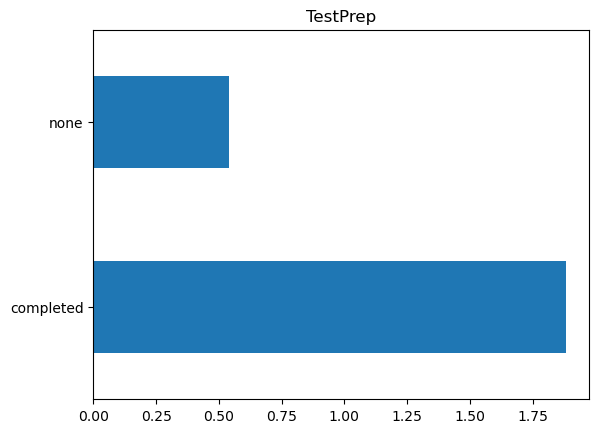

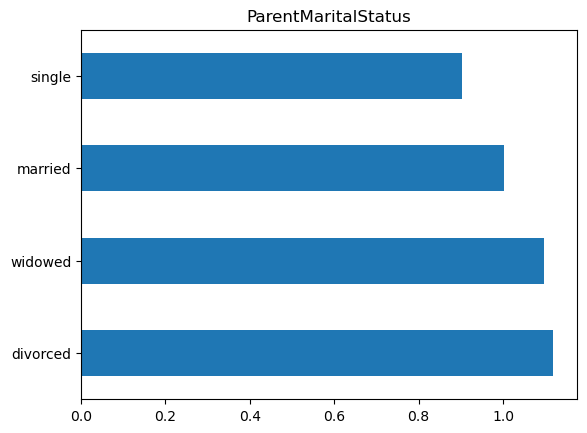

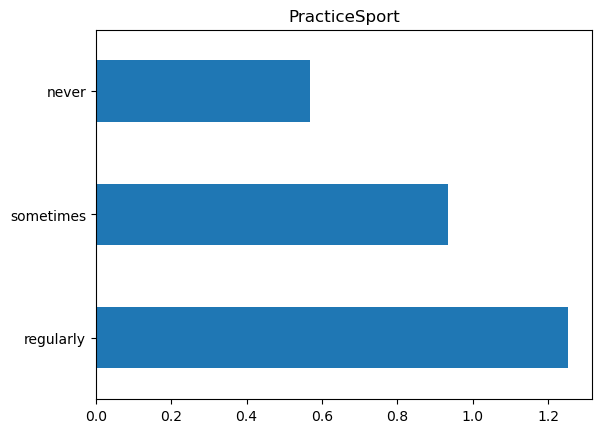

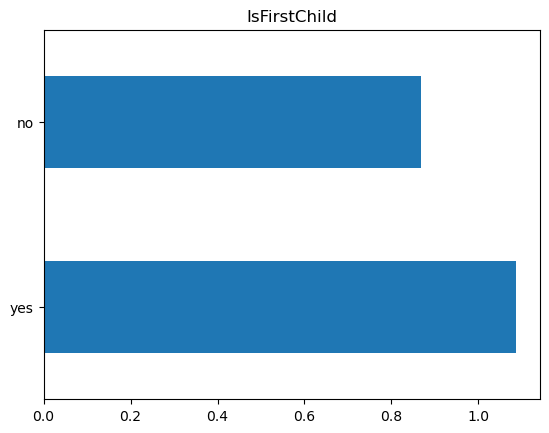

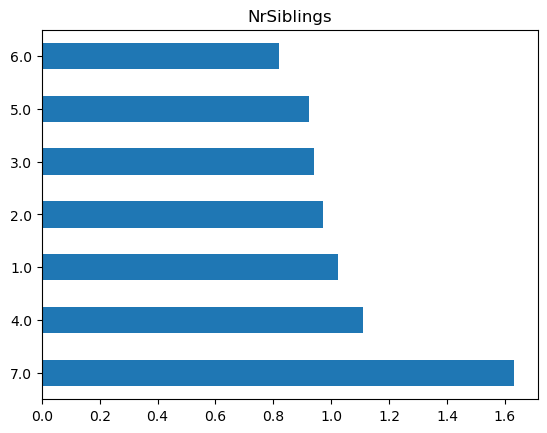

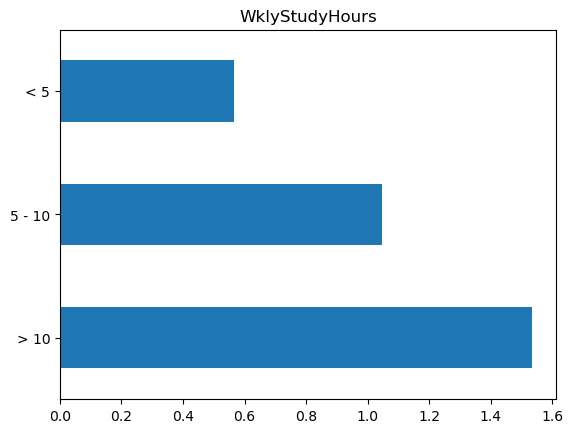

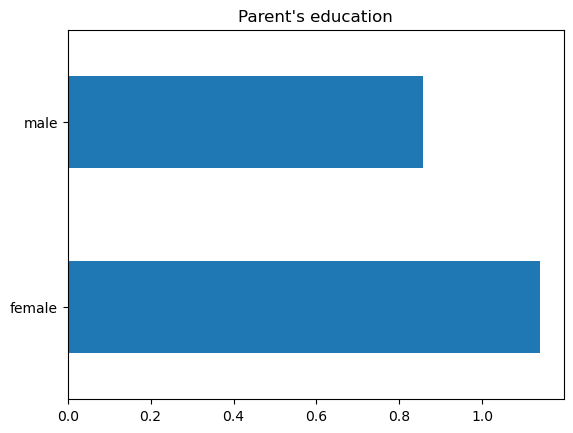

In [59]:
fig,axes = plt.subplots(4,2, figsize=(12,12))
plot_1.plot.barh(title="Parent's education", ylabel='')
plt.show()
plot_2.plot.barh(title="TestPrep", ylabel='')
plt.show()
plot_3.plot.barh(title="ParentMaritalStatus", ylabel='')
plt.show()
plot_4.plot.barh(title="PracticeSport", ylabel='')
plt.show()
plot_5.plot.barh(title="IsFirstChild", ylabel='')
plt.show()
plot_6.plot.barh(title="NrSiblings", ylabel='')
plt.show()
plot_7.plot.barh(title="WklyStudyHours", ylabel='')
plt.show()
plot_8.plot.barh(title="Parent's education", ylabel='')
plt.show()



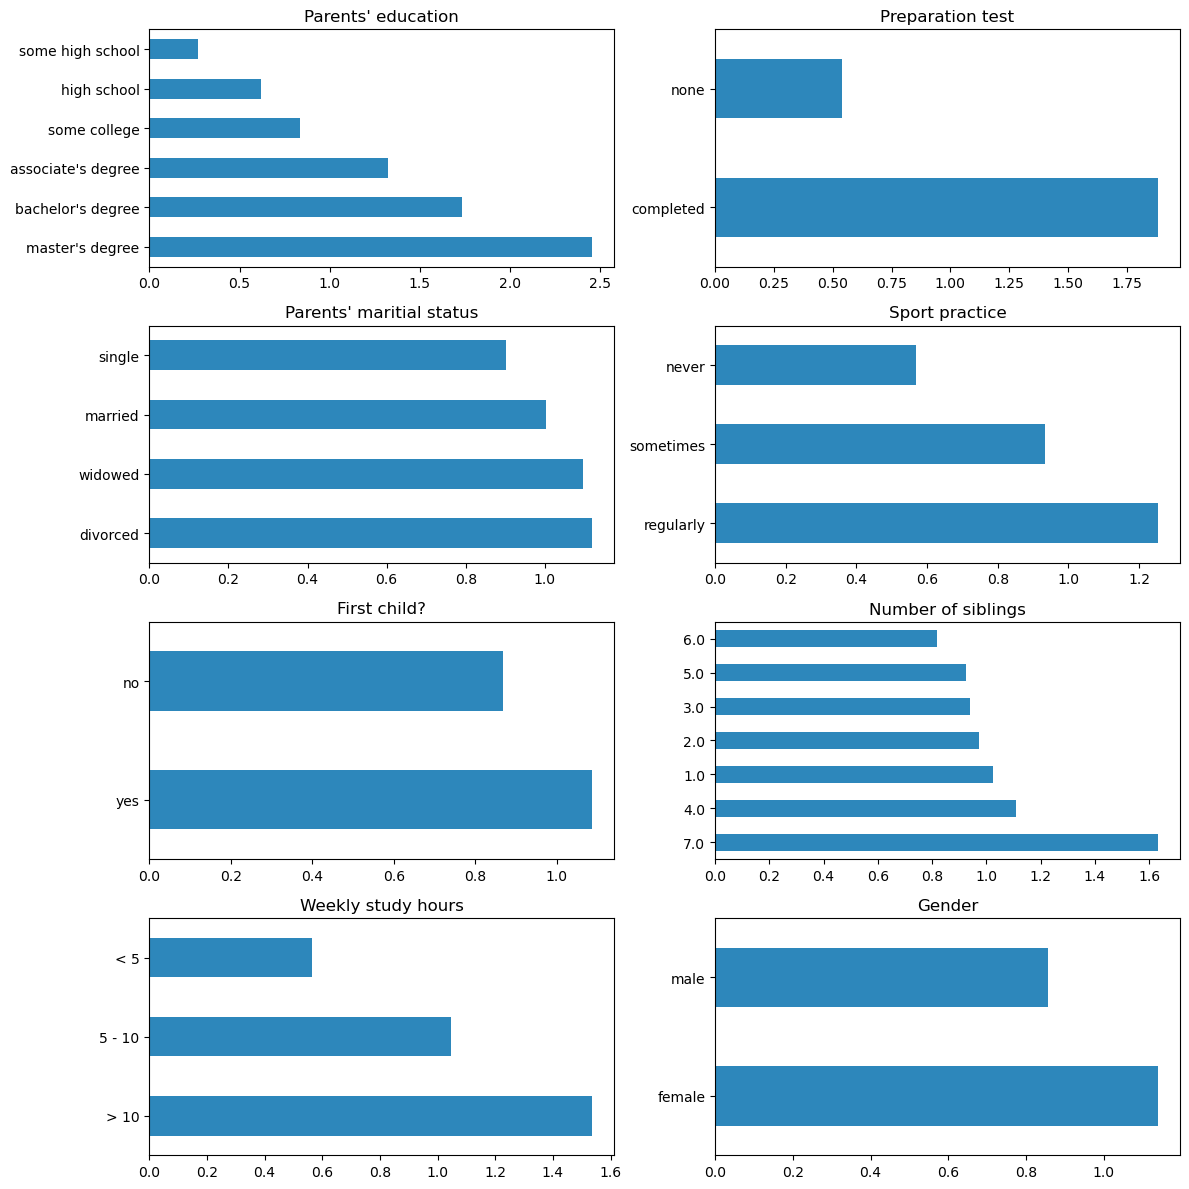

In [60]:
colors = ['#2D87BB']
fig,axes = plt.subplots(4,2, figsize=(12,12))
plot_1.plot.barh(title="Parents' education", ylabel='', color=colors, ax=axes[0,0])
plot_2.plot.barh(title="Preparation test", ylabel='', color=colors, ax=axes[0,1])
plot_3.plot.barh(title="Parents' maritial status", ylabel='', color=colors, ax=axes[1,0])
plot_4.plot.barh(title="Sport practice", ylabel='', color=colors, ax=axes[1,1])
plot_5.plot.barh(title="First child?", ylabel='', color=colors, ax=axes[2,0])
plot_6.plot.barh(title="Number of siblings", ylabel='', color=colors, ax=axes[2,1])
plot_7.plot.barh(title="Weekly study hours", ylabel='', color=colors, ax=axes[3,0])
plot_8.plot.barh(title="Gender", ylabel='', color=colors, ax=axes[3,1])
plt.tight_layout()